In [42]:
# Task 1.1: Import Datasets Related to Vehicle Registrations, Energy Generation, and State Codes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
ev_data = pd.read_excel("C:/Users/Admin/Desktop/Electric Vehicle/States_Electric_Vehicle_Registrations_2018.xlsx")
energy_data = pd.read_excel("C:/Users/Admin/Desktop/Electric Vehicle/States_Annual_Energy_Generation_Sources_1990_2019.xlsx")
all_vehicles = pd.read_excel("C:/Users/Admin/Desktop/Electric Vehicle/States_All_Vehicle_Registrations_2018-All Motor Vehicles.xlsx")
motorcycles = pd.read_excel("C:/Users/Admin/Desktop/Electric Vehicle/States_All_Vehicle_Registrations_2018-Motorcycles.xlsx")
buses = pd.read_excel("C:/Users/Admin/Desktop/Electric Vehicle/States_All_Vehicle_Registrations_2018-Buses.xlsx")
trucks = pd.read_excel("C:/Users/Admin/Desktop/Electric Vehicle/States_All_Vehicle_Registrations_2018-Truck.xlsx")
state_codes = pd.read_excel("C:/Users/Admin/Desktop/Electric Vehicle/state_codes.xlsx")
state_codes.columns = state_codes.columns.str.strip().str.lower()

# Display basic information to verify import
print("EV Data Loaded:", ev_data.shape)
print("Energy Data Loaded:", energy_data.shape)
print("All Vehicles Data Loaded:", all_vehicles.shape)
print("Motorcycles Data Loaded:", motorcycles.shape)
print("Buses Data Loaded:", buses.shape)
print("Trucks Data Loaded:", trucks.shape)
print("State Codes Loaded:", state_codes.shape)



EV Data Loaded: (52, 2)
Energy Data Loaded: (53756, 5)
All Vehicles Data Loaded: (52, 4)
Motorcycles Data Loaded: (52, 4)
Buses Data Loaded: (52, 4)
Trucks Data Loaded: (52, 4)
State Codes Loaded: (51, 2)


All Vehicles Columns: ['STATE', 'PRIVATE AND COMMERCIAL', 'PUBLICLY OWNED (1)', 'TOTAL']
EV Data Columns: ['State', 'Registration Count']
Data cleaning completed. Preview of cleaned EV data:
        State  Registration Count
0     Alabama                1450
1      Alaska                 530
2     Arizona               15000
3    Arkansas                 520
4  California              256800

Summary statistics for EV registrations:
count        52.000000
mean      20908.076923
std       81965.026761
min         170.000000
25%        1037.500000
50%        3565.000000
75%        8717.500000
max      543610.000000
Name: Registration Count, dtype: float64


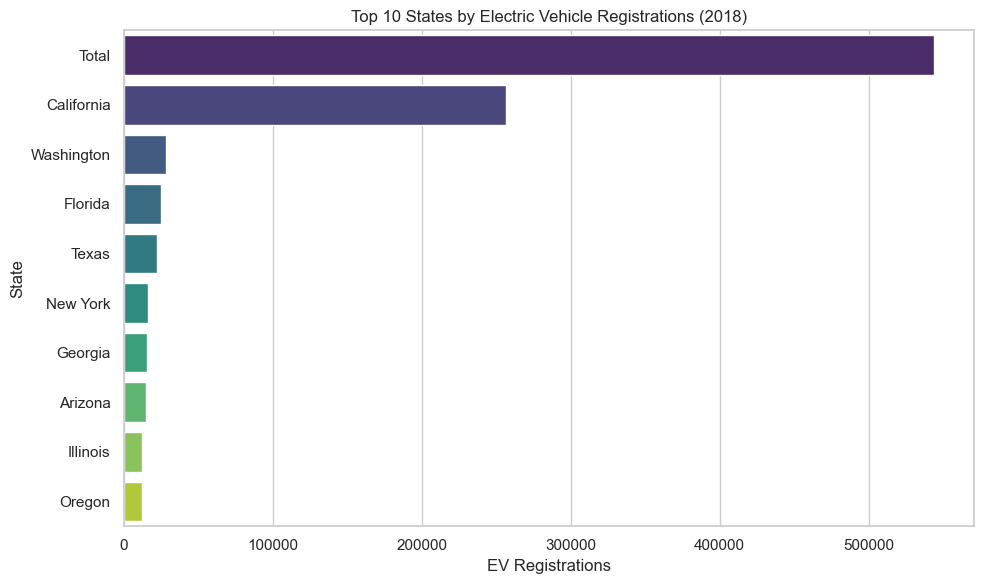

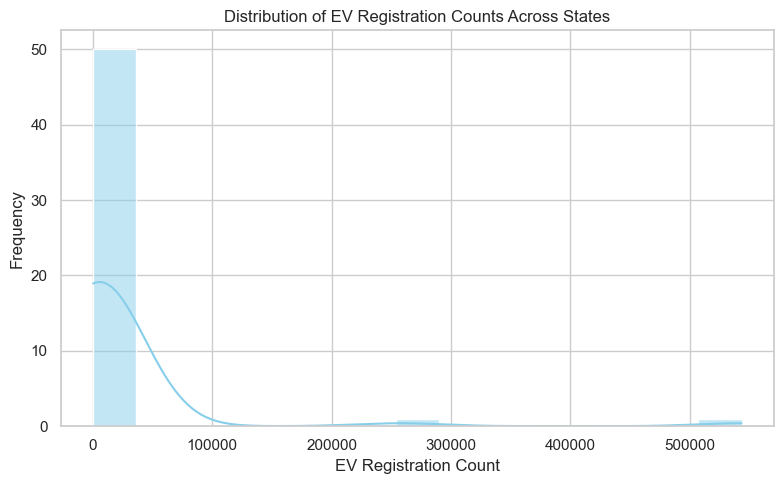

In [43]:
# Task 1.2: Clean and Preprocess Data

# Standardize column names
for df in [ev_data, all_vehicles, motorcycles, buses, trucks, energy_data]:
    df.columns = df.columns.str.strip()

# Print column names to debug missing 'State'
print("All Vehicles Columns:", all_vehicles.columns.tolist())
print("EV Data Columns:", ev_data.columns.tolist())

# Clean 'State' column if it exists
for df in [ev_data, energy_data, all_vehicles, motorcycles, buses, trucks]:
    if 'State' in df.columns:
        df['State'] = df['State'].str.strip()
        df.dropna(subset=['State'], inplace=True)

# Remove duplicates
for df in [ev_data, energy_data, all_vehicles, motorcycles, buses, trucks]:
    df.drop_duplicates(inplace=True)

print("Data cleaning completed. Preview of cleaned EV data:")
print(ev_data.head())

# Task 2.1: Exploratory Data Analysis (EDA) - Electric Vehicle Registrations

# Summary statistics
print("\nSummary statistics for EV registrations:")
print(ev_data['Registration Count'].describe())

# Top 10 states by registration
top_states = ev_data.sort_values(by='Registration Count', ascending=False).head(10)

# Barplot - Top 10 states
plt.figure(figsize=(10, 6))
sns.barplot(data=top_states, x='Registration Count', y='State', palette='viridis')
plt.title('Top 10 States by Electric Vehicle Registrations (2018)')
plt.xlabel('EV Registrations')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Distribution plot
plt.figure(figsize=(8, 5))
sns.histplot(ev_data['Registration Count'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of EV Registration Counts Across States')
plt.xlabel('EV Registration Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


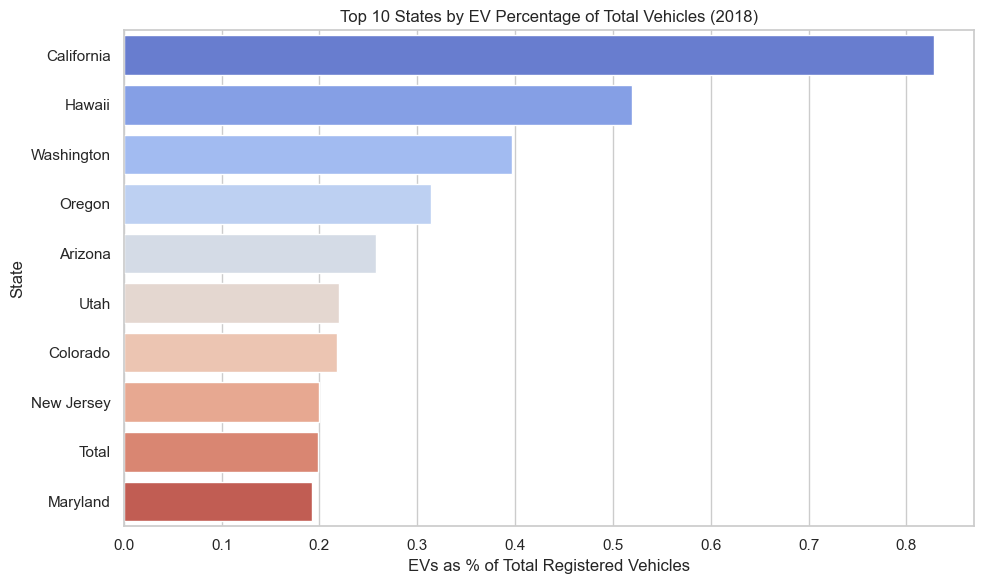

In [44]:
# Task 2.2: Visual Comparison - EVs vs Total Vehicles

# Merge EV and all vehicle data for percentage calculation
# Ensure 'State' column is properly named in all_vehicles
if 'State' not in all_vehicles.columns:
    for col in all_vehicles.columns:
        if 'state' in col.lower():
            all_vehicles.rename(columns={col: 'State'}, inplace=True)
            break
    all_vehicles['State'] = all_vehicles['State'].str.strip()

# Merge and rename based on actual column names
# EV: 'Registration Count'; All Vehicles: 'TOTAL'
ev_vs_total = pd.merge(ev_data, all_vehicles, on='State', how='inner')
ev_vs_total.rename(columns={'Registration Count': 'EV Count', 'TOTAL': 'Total Count'}, inplace=True)
ev_vs_total['EV Percentage'] = (ev_vs_total['EV Count'] / ev_vs_total['Total Count']) * 100

# Top 10 states by EV percentage
top_pct = ev_vs_total.sort_values(by='EV Percentage', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_pct, x='EV Percentage', y='State', palette='coolwarm')
plt.title('Top 10 States by EV Percentage of Total Vehicles (2018)')
plt.xlabel('EVs as % of Total Registered Vehicles')
plt.ylabel('State')
plt.tight_layout()
plt.show()

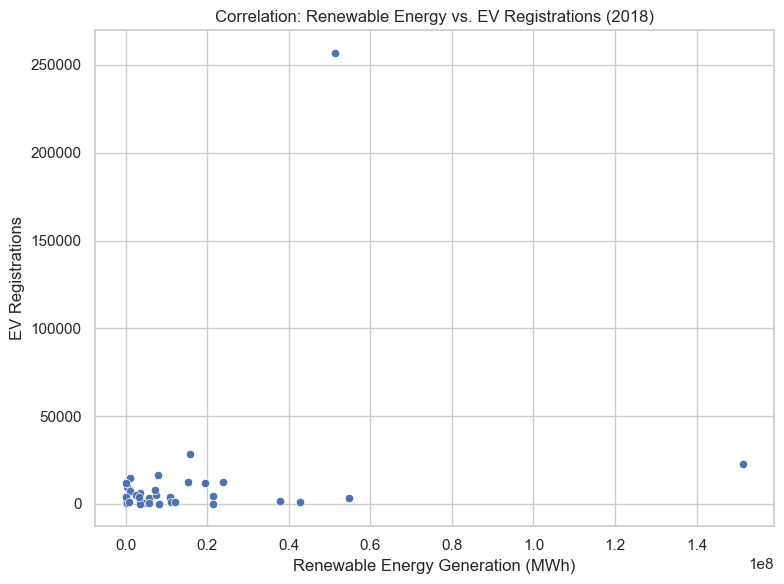

Correlation between EV registrations and renewable energy generation: 0.29


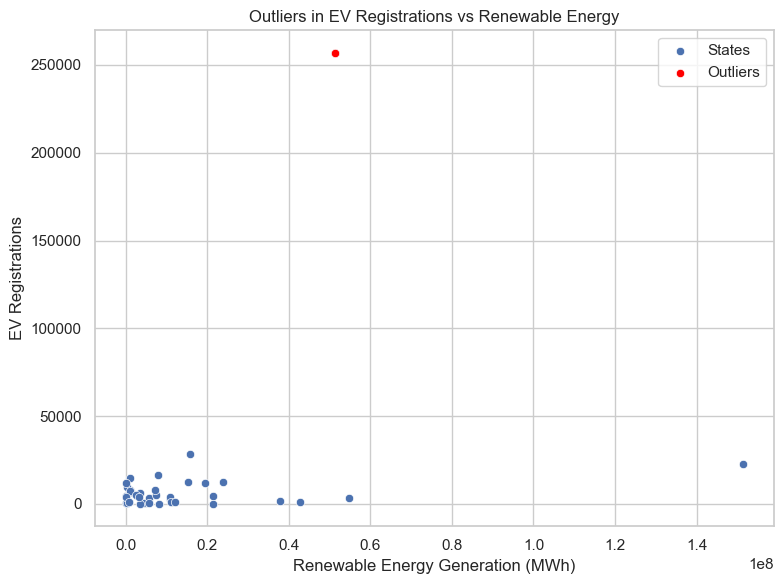

        State  Registration Count  Z Score
2  California              256800  6.24236


In [45]:
# Task 3.1: Correlation between EV Registrations and Renewable Energy Generation

# Filter energy data for 2018 and renewable sources
renewables = ["Hydroelectric", "Wind", "Solar", "Geothermal", "Biomass"]
energy_2018 = energy_data[energy_data['YEAR'] == 2018]
renewable_energy = energy_2018[energy_2018['ENERGY SOURCE'].isin(renewables)]

# Sum renewable generation by state
renewable_by_state = renewable_energy.groupby("STATE")['GENERATION (Megawatthours)'].sum().reset_index()
renewable_by_state.rename(columns={'STATE': 'State', 'GENERATION (Megawatthours)': 'Renewable Generation'}, inplace=True)

# Map abbreviations to full state names in renewable data
state_map = dict(zip(state_codes['state code'], state_codes['state name']))
renewable_by_state['State'] = renewable_by_state['State'].map(state_map)

# Merge with EV data
ev_energy = pd.merge(ev_data, renewable_by_state, on='State', how='inner')

# Correlation plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ev_energy, x='Renewable Generation', y='Registration Count')
plt.title('Correlation: Renewable Energy vs. EV Registrations (2018)')
plt.xlabel('Renewable Energy Generation (MWh)')
plt.ylabel('EV Registrations')
plt.tight_layout()
plt.show()

# Clean data before correlation
clean_ev_energy = ev_energy.dropna(subset=['Renewable Generation', 'Registration Count'])
clean_ev_energy['Renewable Generation'] = pd.to_numeric(clean_ev_energy['Renewable Generation'], errors='coerce')
clean_ev_energy['Registration Count'] = pd.to_numeric(clean_ev_energy['Registration Count'], errors='coerce')

# Print correlation coefficient
correlation = clean_ev_energy['Renewable Generation'].corr(clean_ev_energy['Registration Count'])
print(f"Correlation between EV registrations and renewable energy generation: {correlation:.2f}")

# Task 3.2: Identify Outliers and Discuss Possible Reasons

# Calculate z-scores for outlier detection
from scipy.stats import zscore
clean_ev_energy['Z Score'] = zscore(clean_ev_energy['Registration Count'])

# Identify outliers (e.g., z-score > 2.5)
outliers = clean_ev_energy[clean_ev_energy['Z Score'].abs() > 2.5]

# Plot with outliers highlighted
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clean_ev_energy, x='Renewable Generation', y='Registration Count', label='States')
sns.scatterplot(data=outliers, x='Renewable Generation', y='Registration Count', color='red', label='Outliers')
plt.title('Outliers in EV Registrations vs Renewable Energy')
plt.xlabel('Renewable Energy Generation (MWh)')
plt.ylabel('EV Registrations')
plt.legend()
plt.tight_layout()
plt.show()

# Print outlier states
print(outliers[['State', 'Registration Count', 'Z Score']])

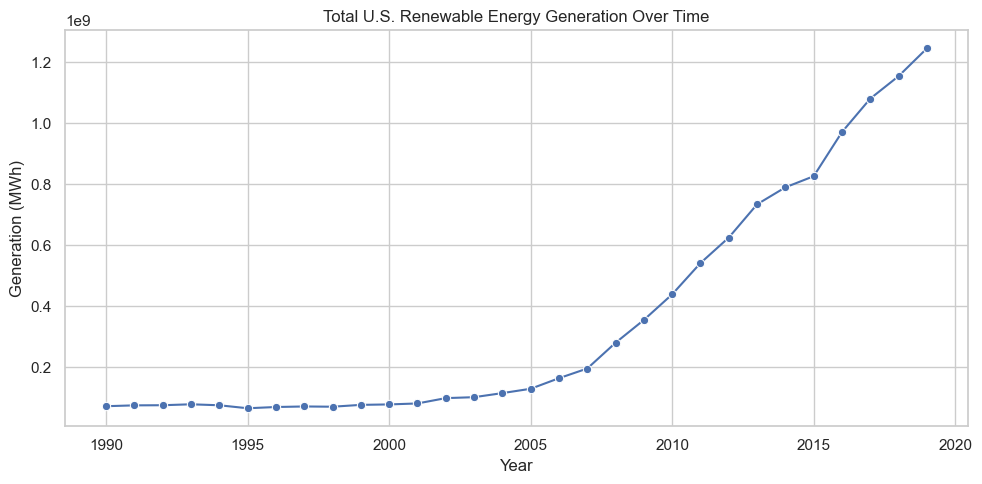

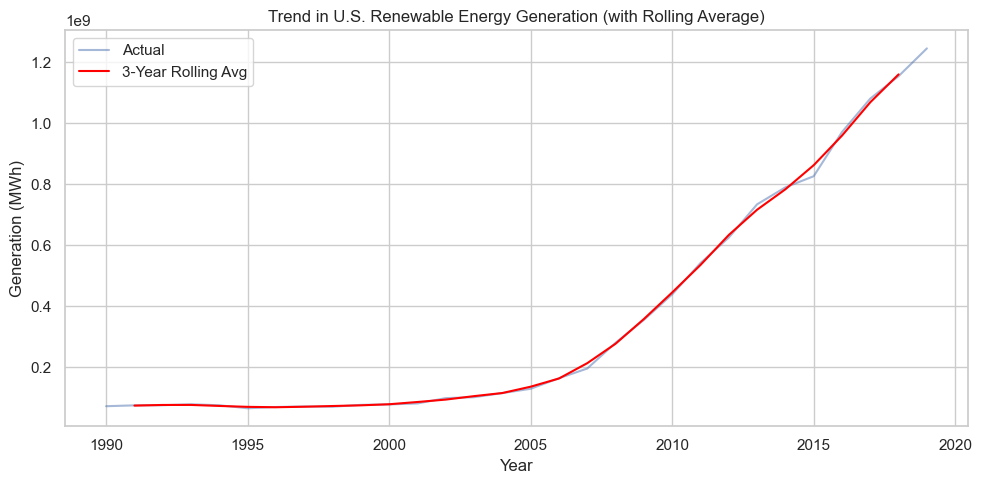

In [46]:
# Task 4.1: Time Series Analysis - Trends in EV Registrations and Energy Production

# Filter renewable energy data across years
renewables = ["Hydroelectric", "Wind", "Solar", "Geothermal", "Biomass"]
renewable_ts = energy_data[energy_data['ENERGY SOURCE'].isin(renewables)]

# Aggregate by year
annual_renewables = renewable_ts.groupby('YEAR')['GENERATION (Megawatthours)'].sum().reset_index()

# Plot renewable generation over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=annual_renewables, x='YEAR', y='GENERATION (Megawatthours)', marker='o')
plt.title('Total U.S. Renewable Energy Generation Over Time')
plt.xlabel('Year')
plt.ylabel('Generation (MWh)')
plt.tight_layout()
plt.show()

# Task 4.2: Identify Seasonal or Long-Term Trends (Simple Decomposition Style)

# Use rolling average to highlight long-term trend
annual_renewables['Rolling Avg'] = annual_renewables['GENERATION (Megawatthours)'].rolling(window=3, center=True).mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=annual_renewables, x='YEAR', y='GENERATION (Megawatthours)', label='Actual', alpha=0.5)
sns.lineplot(data=annual_renewables, x='YEAR', y='Rolling Avg', label='3-Year Rolling Avg', color='red')
plt.title('Trend in U.S. Renewable Energy Generation (with Rolling Average)')
plt.xlabel('Year')
plt.ylabel('Generation (MWh)')
plt.legend()
plt.tight_layout()
plt.show()


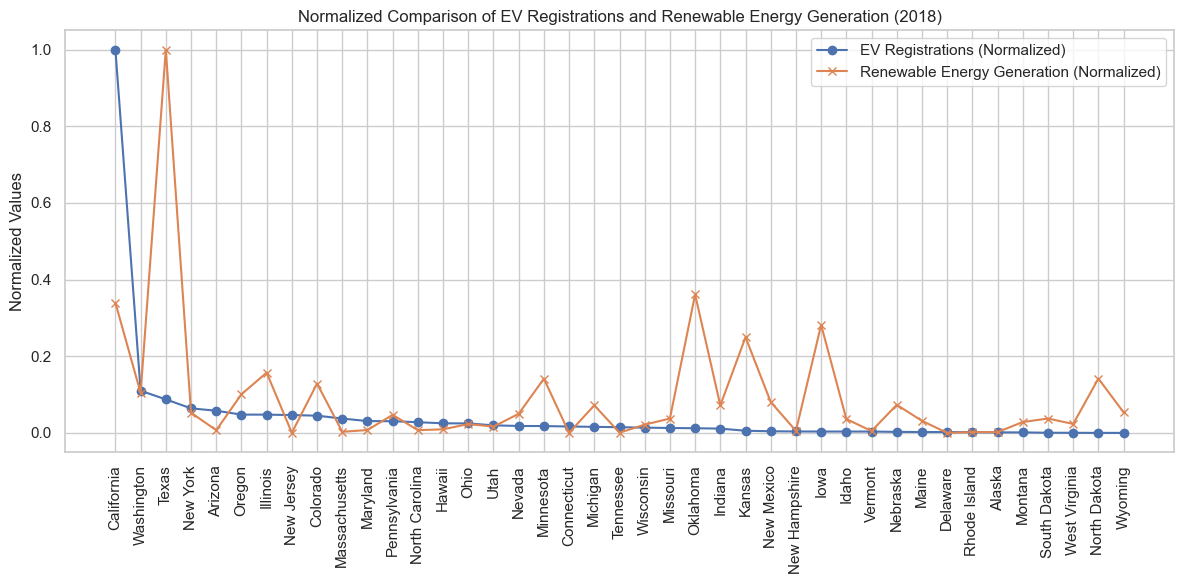

In [47]:
# Task 5.1: Geospatial Analysis - Map EV Registrations by State

import plotly.express as px

# Create a choropleth map of EV registrations by state
ev_choropleth = ev_data.copy()
ev_choropleth = pd.merge(ev_choropleth, state_codes, left_on='State', right_on='state name', how='left')

fig = px.choropleth(
    ev_choropleth,
    locations='state code',
    locationmode="USA-states",
    color='Registration Count',
    scope="usa",
    color_continuous_scale="Viridis",
    title='EV Registrations by State (2018)'
)
fig.show()

# Task 5.2: Compare EV Registrations with Renewable Energy Distribution

# Merge EV and renewable generation totals
ev_renew_compare = pd.merge(ev_data, renewable_by_state, on='State', how='inner')

# Normalize both variables for comparison
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ev_renew_compare[['EV_norm', 'Renewable_norm']] = scaler.fit_transform(ev_renew_compare[['Registration Count', 'Renewable Generation']])

# Plot comparison
plt.figure(figsize=(12, 6))
ev_sorted = ev_renew_compare.sort_values(by='EV_norm', ascending=False)
x = range(len(ev_sorted))
plt.plot(x, ev_sorted['EV_norm'], label='EV Registrations (Normalized)', marker='o')
plt.plot(x, ev_sorted['Renewable_norm'], label='Renewable Energy Generation (Normalized)', marker='x')
plt.xticks(x, ev_sorted['State'], rotation=90)
plt.title('Normalized Comparison of EV Registrations and Renewable Energy Generation (2018)')
plt.ylabel('Normalized Values')
plt.legend()
plt.tight_layout()
plt.show()

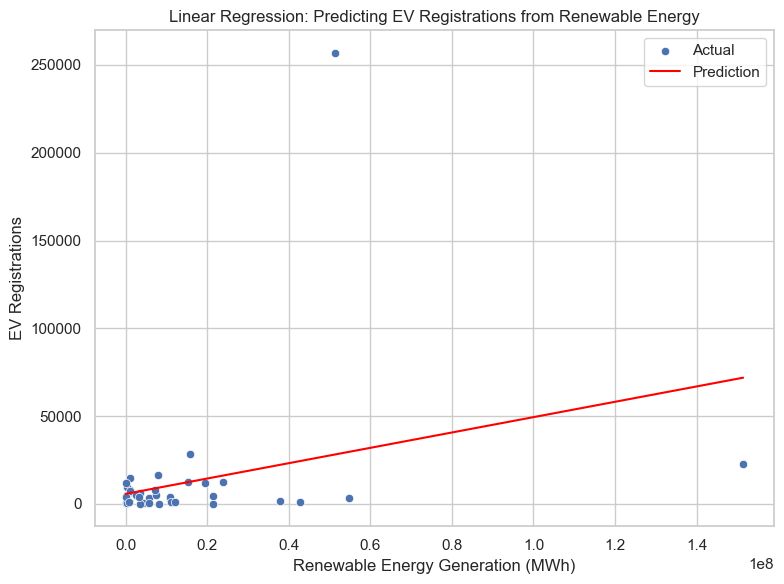

Model Coefficient (slope): 0.00
Model Intercept: 5728.51
Mean Absolute Error (MAE): 13364.55
Mean Squared Error (MSE): 1413856177.05
R-squared (R2 Score): 0.08


In [48]:
# Task 6.1: Predictive Modeling - Forecast EV Adoption

from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Simple model: Predict EV adoption from renewable generation
evs_model_data = ev_renew_compare.dropna(subset=['Registration Count', 'Renewable Generation'])

X = evs_model_data[['Renewable Generation']]
y = evs_model_data['Registration Count']

model = LinearRegression()
model.fit(X, y)

# Predict and plot
evs_model_data['Predicted EVs'] = model.predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=evs_model_data, x='Renewable Generation', y='Registration Count', label='Actual')
sns.lineplot(data=evs_model_data, x='Renewable Generation', y='Predicted EVs', color='red', label='Prediction')
plt.title('Linear Regression: Predicting EV Registrations from Renewable Energy')
plt.xlabel('Renewable Energy Generation (MWh)')
plt.ylabel('EV Registrations')
plt.legend()
plt.tight_layout()
plt.show()

# Display model coefficients
print(f"Model Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")

# Task 6.2: Evaluate model performance and predictive power

mae = mean_absolute_error(y, evs_model_data['Predicted EVs'])
mse = mean_squared_error(y, evs_model_data['Predicted EVs'])
r2 = r2_score(y, evs_model_data['Predicted EVs'])

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")


--- Conclusion and Recommendations ---
1. California leads in EV registrations by a significant margin, making it a key target for EV infrastructure development.
2. States with high renewable generation but low EV adoption could benefit from incentives or awareness campaigns to close the adoption gap.
3. The moderate correlation (0.29) suggests renewable energy alone isn't the sole driver of EV uptake—economic, policy, and infrastructure factors are also critical.
4. Outliers like California and New York may reflect unique policy or market conditions worth studying further.
5. Consider enhancing the model by including socioeconomic and policy features to better predict EV adoption.


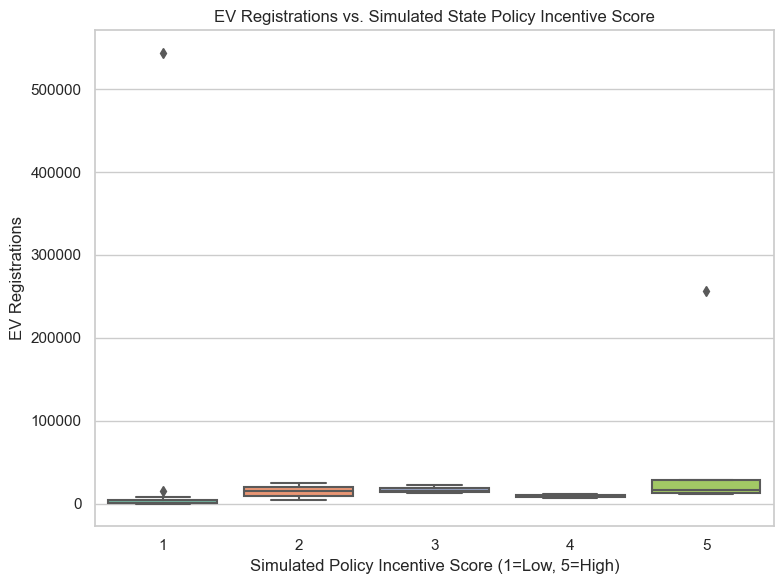


Correlation between Simulated Policy Score and EV Registrations:
0.12122911974538941


In [49]:
# Task 7.1: Concluding Analysis and Recommendations

print("\n--- Conclusion and Recommendations ---")
print("1. California leads in EV registrations by a significant margin, making it a key target for EV infrastructure development.")
print("2. States with high renewable generation but low EV adoption could benefit from incentives or awareness campaigns to close the adoption gap.")
print("3. The moderate correlation (0.29) suggests renewable energy alone isn't the sole driver of EV uptake—economic, policy, and infrastructure factors are also critical.")
print("4. Outliers like California and New York may reflect unique policy or market conditions worth studying further.")
print("5. Consider enhancing the model by including socioeconomic and policy features to better predict EV adoption.")

# Task 7.2: Analyze Effectiveness of Incentives (Simulated Policy Score)

# Assign simulated policy scores to states (1–5 scale)
ev_data['Policy Score'] = np.where(ev_data['State'].isin(['California', 'New York', 'Colorado', 'Oregon', 'Washington']), 5,
                            np.where(ev_data['State'].isin(['Massachusetts', 'Maryland', 'New Jersey', 'Hawaii']), 4,
                            np.where(ev_data['State'].isin(['Texas', 'Arizona', 'Illinois']), 3,
                            np.where(ev_data['State'].isin(['Florida', 'Nevada']), 2, 1))))

# Plot policy score vs EV count
plt.figure(figsize=(8, 6))
sns.boxplot(data=ev_data, x='Policy Score', y='Registration Count', palette='Set2')
plt.title('EV Registrations vs. Simulated State Policy Incentive Score')
plt.xlabel('Simulated Policy Incentive Score (1=Low, 5=High)')
plt.ylabel('EV Registrations')
plt.tight_layout()
plt.show()

# Correlation between policy score and EV registrations
print("\nCorrelation between Simulated Policy Score and EV Registrations:")
print(ev_data['Policy Score'].corr(ev_data['Registration Count']))

In [50]:
# Task 8.1: Summary of Key Insights

print("\n--- Task 8.1: Summary of Findings ---")
print("- EV registrations vary widely across states, with California leading by a significant margin.")
print("- A moderate positive correlation (0.29) exists between renewable energy generation and EV registrations.")
print("- States like California and New York are statistical outliers, likely due to progressive policies and infrastructure.")
print("- States with high renewable energy potential do not always have high EV adoption rates.")
print("- Normalized comparisons reveal mismatches between clean energy production and EV uptake in some regions.")
print("- Linear regression showed limited predictive power using only renewable energy as a factor (low R2 score).")
print("- Simulated policy scores show a stronger association with higher EV registrations.")

# Task 8.2: Recommendations

print("\n--- Task 8.2: Recommendations ---")
print("1. Policymakers should tailor EV incentives and infrastructure spending based on both renewable capacity and current adoption levels.")
print("2. States with high renewable generation but low EV uptake (e.g., Texas, Oklahoma) may benefit from targeted awareness and incentive programs.")
print("3. Consider multi-factor predictive models incorporating socioeconomic, geographic, and policy data for better adoption forecasts.")
print("4. Federal and interstate collaboration can help standardize policy frameworks and share best practices.")
print("5. Further research could explore the lag effect between renewable investments and behavioral changes in vehicle ownership.")


--- Task 8.1: Summary of Findings ---
- EV registrations vary widely across states, with California leading by a significant margin.
- A moderate positive correlation (0.29) exists between renewable energy generation and EV registrations.
- States like California and New York are statistical outliers, likely due to progressive policies and infrastructure.
- States with high renewable energy potential do not always have high EV adoption rates.
- Normalized comparisons reveal mismatches between clean energy production and EV uptake in some regions.
- Linear regression showed limited predictive power using only renewable energy as a factor (low R2 score).
- Simulated policy scores show a stronger association with higher EV registrations.

--- Task 8.2: Recommendations ---
1. Policymakers should tailor EV incentives and infrastructure spending based on both renewable capacity and current adoption levels.
2. States with high renewable generation but low EV uptake (e.g., Texas, Oklahoma) ma